<a href="https://colab.research.google.com/github/MAH203838/phishingURLchecker_FYP/blob/main/FYP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import pickle

**Import and Read CSV File**

In [ ]:
df = pd.read_csv("dataset.csv")

In [ ]:
df1 = df[["URL_of_Anchor","Prefix_Suffix","web_traffic","having_Sub_Domain","Request_URL","Links_in_tags","SFH","Google_Index","age_of_domain","Page_Rank","having_IPhaving_IP_Address","Statistical_report","DNSRecord","URLURL_Length","having_At_Symbol","on_mouseover","port","Links_pointing_to_page","Submitting_to_email","RightClick","popUpWidnow","Favicon","Iframe","Redirect","double_slash_redirecting","HTTPS_token","Abnormal_URL","Shortining_Service","Domain_registeration_length","Result"]]

**Analayze Data Set**

In [ ]:
df.shape

(11055, 32)

In [ ]:
df['Abnormal_URL'].value_counts()

 1    9426
-1    1629
Name: Abnormal_URL, dtype: int64

In [ ]:
df.head()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [ ]:
df.columns

Index(['index', 'having_IPhaving_IP_Address', 'URLURL_Length',
       'Shortining_Service', 'having_At_Symbol', 'double_slash_redirecting',
       'Prefix_Suffix', 'having_Sub_Domain', 'SSLfinal_State',
       'Domain_registeration_length', 'Favicon', 'port', 'HTTPS_token',
       'Request_URL', 'URL_of_Anchor', 'Links_in_tags', 'SFH',
       'Submitting_to_email', 'Abnormal_URL', 'Redirect', 'on_mouseover',
       'RightClick', 'popUpWidnow', 'Iframe', 'age_of_domain', 'DNSRecord',
       'web_traffic', 'Page_Rank', 'Google_Index', 'Links_pointing_to_page',
       'Statistical_report', 'Result'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   index                        11055 non-null  int64
 1   having_IPhaving_IP_Address   11055 non-null  int64
 2   URLURL_Length                11055 non-null  int64
 3   Shortining_Service           11055 non-null  int64
 4   having_At_Symbol             11055 non-null  int64
 5   double_slash_redirecting     11055 non-null  int64
 6   Prefix_Suffix                11055 non-null  int64
 7   having_Sub_Domain            11055 non-null  int64
 8   SSLfinal_State               11055 non-null  int64
 9   Domain_registeration_length  11055 non-null  int64
 10  Favicon                      11055 non-null  int64
 11  port                         11055 non-null  int64
 12  HTTPS_token                  11055 non-null  int64
 13  Request_URL                  11055 non-null  i

In [ ]:
df.describe()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,...,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000
mean,5528.000000,0.313795,-0.633198,0.738761,0.700588,0.741474,-0.734962,0.063953,0.250927,-0.336771,...,0.613388,0.816915,0.061239,0.377114,0.287291,-0.483673,0.721574,0.344007,0.719584,0.113885
std,3191.447947,0.949534,0.766095,0.673998,0.713598,0.671011,0.678139,0.817518,0.911892,0.941629,...,0.789818,0.576784,0.998168,0.926209,0.827733,0.875289,0.692369,0.569944,0.694437,0.993539
min,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,2764.500000,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,5528.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,8291.500000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,11055.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Heatmap in Seaborn**

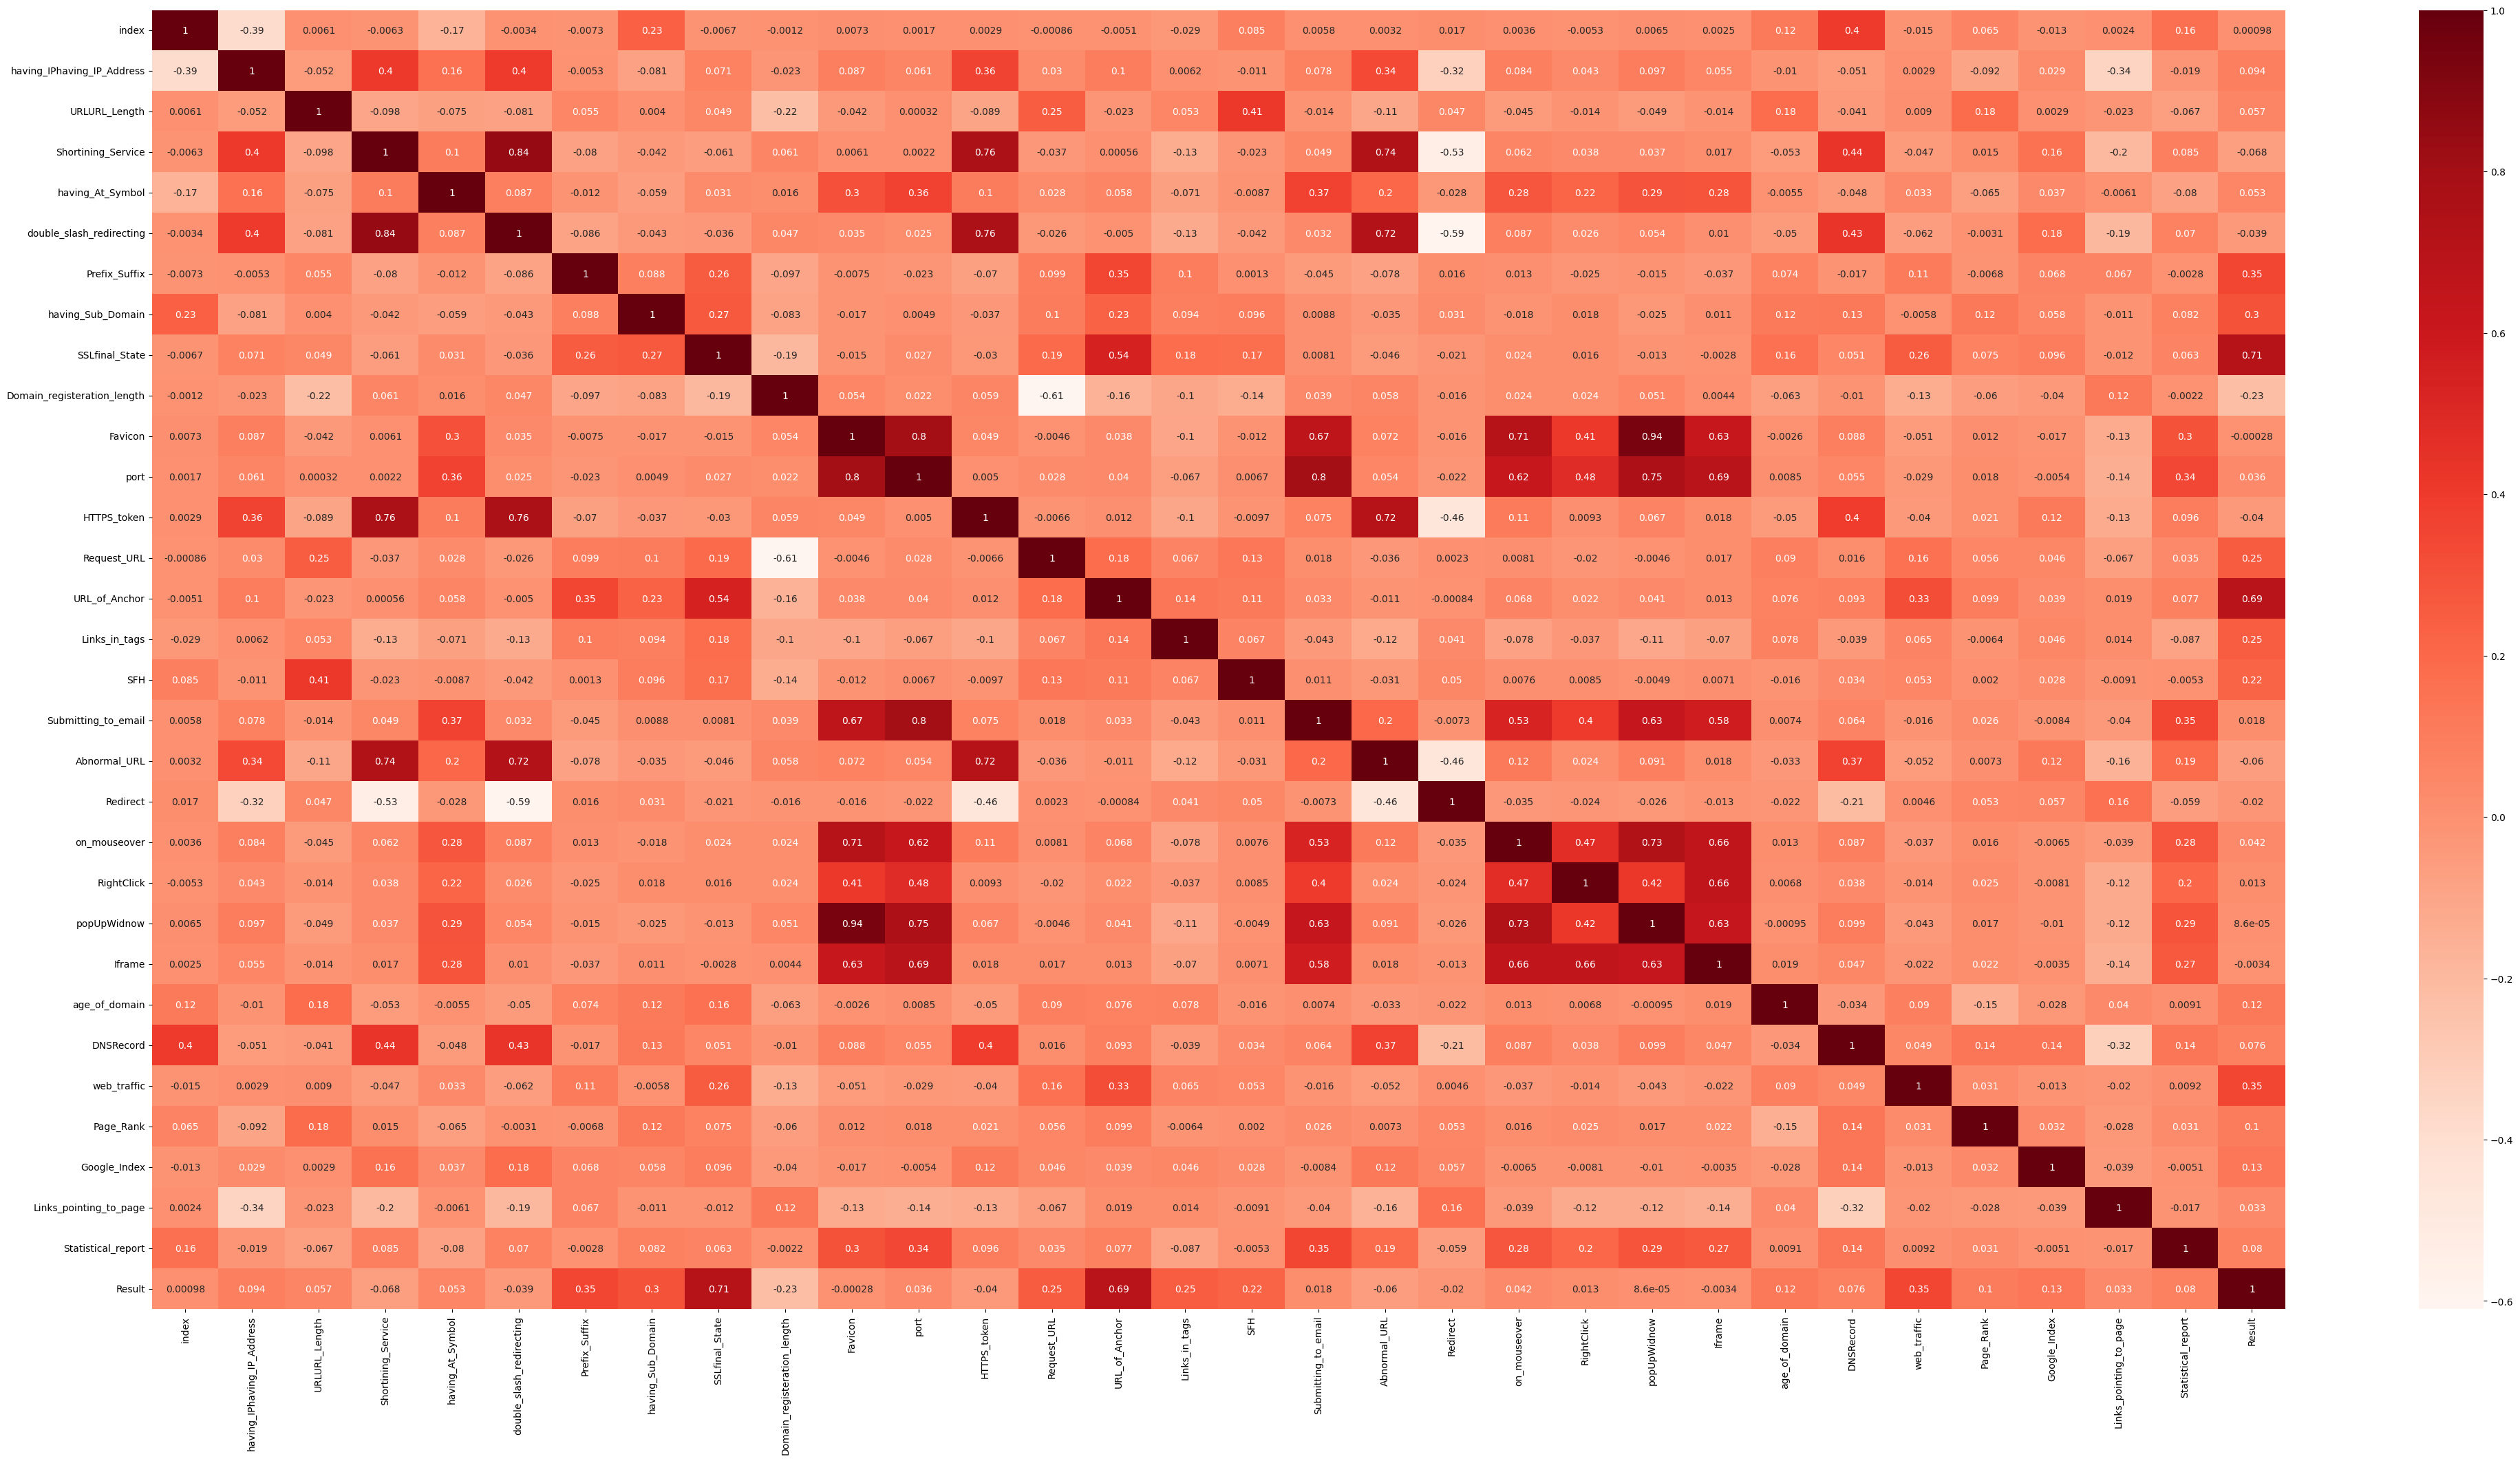

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(50,25),dpi=100)
sns.heatmap(df.corr(),annot=True,cmap="Reds")
plt.show()
plt.savefig("heatmap.png")

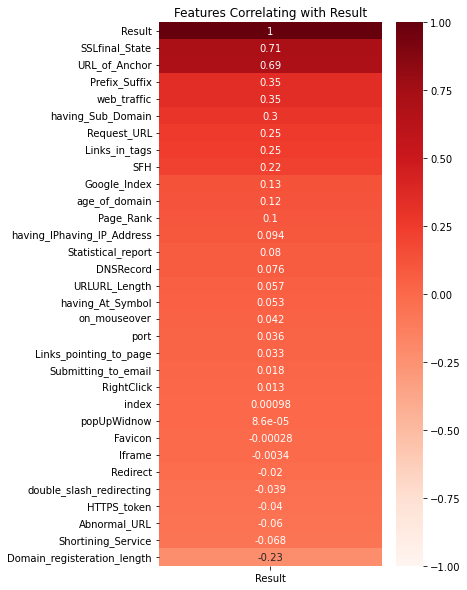

In [ ]:
plt.figure(figsize=(5,10))
heatmap = sns.heatmap(df.corr()[['Result']].sort_values(by='Result', ascending=False), vmin=-1, vmax=1, annot=True,cmap="Reds")
heatmap.set_title('Features Correlating with Result');

**Analyze by pivoting features strong positive correlating with result**

In [ ]:
df[['SSLfinal_State', 'Result']].groupby(['SSLfinal_State'], as_index=True).mean().sort_values(by='SSLfinal_State', ascending=True)

,Result
SSLfinal_State,
-1,-0.715491
0,-0.964010
1,0.778550


In [ ]:
df[['URL_of_Anchor', 'Result']].groupby(['URL_of_Anchor'], as_index=True).mean().sort_values(by='URL_of_Anchor', ascending=True)

,Result
URL_of_Anchor,
-1,-0.978062
0,0.437137
1,0.876847


In [ ]:
df[['Prefix_Suffix', 'Result']].groupby(['Prefix_Suffix'], as_index=True).mean().sort_values(by='Prefix_Suffix', ascending=True)

,Result
Prefix_Suffix,
-1,-0.021481
1,1.000000


**Analyze by pivoting features strong negative correlating with result**

In [ ]:
df[['Abnormal_URL', 'Result']].groupby(['Abnormal_URL'], as_index=True).mean().sort_values(by='Abnormal_URL', ascending=True)

,Result
Abnormal_URL,
-1,0.258441
1,0.088903


In [ ]:
df[['Shortining_Service', 'Result']].groupby(['Shortining_Service'], as_index=True).mean().sort_values(by='Shortining_Service', ascending=True)

,Result
Shortining_Service,
-1,0.288089
1,0.087712


In [ ]:
df[['Domain_registeration_length', 'Result']].groupby(['Domain_registeration_length'], as_index=True).mean().sort_values(by='Domain_registeration_length', ascending=True)

,Result
Domain_registeration_length,
-1,0.271891
1,-0.204583


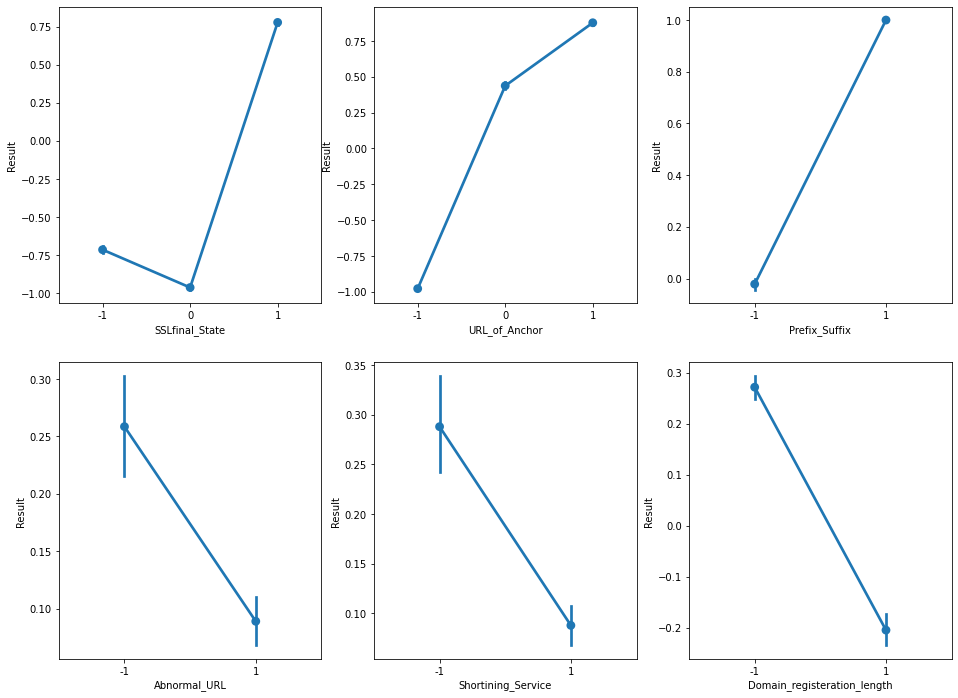

In [ ]:
fig, saxis = plt.subplots(2, 3,figsize=(16,12))

sns.pointplot(x = 'SSLfinal_State', y = 'Result', data=df, ax = saxis[0,0])
sns.pointplot(x = 'URL_of_Anchor', y = 'Result', data=df, ax = saxis[0,1])
sns.pointplot(x = 'Prefix_Suffix', y = 'Result', data=df, ax = saxis[0,2])

sns.pointplot(x = 'Abnormal_URL', y = 'Result',  data=df, ax = saxis[1,0])
sns.pointplot(x = 'Shortining_Service', y = 'Result',  data=df, ax = saxis[1,1])
sns.pointplot(x = 'Domain_registeration_length', y = 'Result', data=df, ax = saxis[1,2])

**Strong Positive Correlating Features With Result**

In [ ]:
fig=px.histogram(df, x="SSLfinal_State",color="Result",hover_data=df.columns,title="Secure socket layer(HTTPS)",barmode="group")
fig.show()

In [ ]:
fig=px.histogram(df, x="URL_of_Anchor",color="Result",hover_data=df.columns,title="URL of anchor",barmode="group")
fig.show()

**Strong Negative Correlating Features with Result**

In [ ]:
fig=px.histogram(df, x="Shortining_Service",color="Result",hover_data=df.columns,title="Shortening URL",barmode="group")
fig.show()

In [ ]:
fig=px.histogram(df, x="Domain_registeration_length",color="Result",hover_data=df.columns,title="Expire date of domain",barmode="group")
fig.show()

**Function of Confusion Matrix**

In [ ]:
def matrix(Y_pred,Y_test):
  cm=confusion_matrix(Y_test,Y_pred)
  class_label = ["-1", "1"]
  df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
  sns.heatmap(df_cm,annot=True,cmap='coolwarm',linewidths=2,fmt='d')
  plt.title("Confusion Matrix",fontsize=15)
  plt.xlabel("Predicted")
  plt.ylabel("True")
  plt.show()

ML_Model=[]
Features=[]
acc_train=[]
acc_test=[]
acc_Ftrain=[]
acc_Ftest=[]

# Function to store the accuracy result
def storeResult(model, a, b):
  ML_Model.append(model)
  acc_train.append(a)
  acc_test.append(b)

def featuresResult(features,a,b):
  Features.append(features)
  acc_Ftrain.append(a)
  acc_Ftest.append(b)

**Create Object of testing and training data**

In [ ]:
X = df.drop('Result',axis=1).values 
Y = df['Result'].values

**Split data set into 80% of testing purpose and 20% of training purpose**

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 8844 samples.
Testing set has 2211 samples.


**Logistics Regression Classifier**

In [ ]:
#Create Logistics Regression Object
logreg=LogisticRegression(random_state=42)
 
#Train the model using training data 
logreg.fit(X_train,Y_train)

#Test the model using testing data
Y_train_logreg=logreg.predict(X_train)
Y_test_logreg=logreg.predict(X_test)

#Logistics Regression Accuracy
acc_train_logreg=round(((accuracy_score(Y_train, Y_train_logreg))*100),3)
acc_test_logreg=round(((accuracy_score(Y_test, Y_test_logreg))*100),3)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print("The accuracy of Logistics Regression on training data is: ", acc_train_logreg,"%")
print("The accuracy of Logistics Regression on testing data is: ", acc_test_logreg,"%")

The accuracy of Logistics Regression on training data is:  92.108 %
The accuracy of Logistics Regression on testing data is:  91.768 %


In [ ]:
print(classification_report(Y_test,Y_test_logreg))

              precision    recall  f1-score   support

          -1       0.92      0.89      0.90       956
           1       0.92      0.94      0.93      1255

    accuracy                           0.92      2211
   macro avg       0.92      0.91      0.92      2211
weighted avg       0.92      0.92      0.92      2211



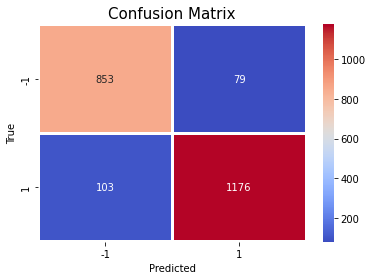

In [ ]:
#Confusion Matrix Table
matrix(Y_test,Y_test_logreg)

#Store Result
storeResult(logreg, acc_train_logreg, acc_test_logreg)

**K-Nearest Neighbors**

In [ ]:
#Create KNN Object with different number of k
knn=KNeighborsClassifier()
 
#Train the model using training data 
knn.fit(X_train,Y_train)

#Test the model using testing data
Y_train_knn=knn.predict(X_train)
Y_test_knn=knn.predict(X_test)

#KNN Accuracy
acc_train_knn=round(((accuracy_score(Y_train, Y_train_knn))*100),3)
acc_test_knn=round(((accuracy_score(Y_test, Y_test_knn))*100),3)

In [ ]:
print("The accuracy of KNN on training data is: ", acc_train_knn,"%")
print("The accuracy of KNN on testing data is: ", acc_test_knn,"%")

The accuracy of KNN on training data is:  77.974 %
The accuracy of KNN on testing data is:  60.335 %


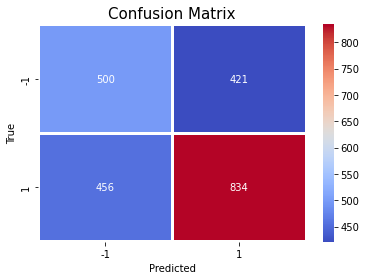

In [ ]:
#Confusion Matrix Table
matrix(Y_test,Y_test_knn)

#Store Result
storeResult(knn, acc_train_knn, acc_test_knn)

**Random Forest**

In [ ]:
#Create Random Forest Object
random_forest=RandomForestClassifier(random_state=42)
 
#Train the model using training data 
random_forest.fit(X_train,Y_train)

#Test the model using testing data
Y_train_random_forest=random_forest.predict(X_train)
Y_test_random_forest=random_forest.predict(X_test)

#Random Forest Accuracy
acc_train_random_forest=round(((accuracy_score(Y_train, Y_train_random_forest))*100),3)
acc_test_random_forest=round(((accuracy_score(Y_test, Y_test_random_forest))*100),3)

In [ ]:
print("The accuracy of Random Forest on training data is: ", acc_train_random_forest,"%")
print("The accuracy of Random Forest on testing data is: ", acc_test_random_forest,"%")

The accuracy of Random Forest on training data is:  98.304 %
The accuracy of Random Forest on testing data is:  95.115 %


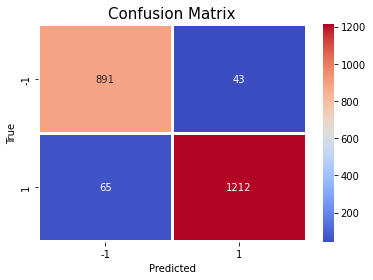

In [ ]:
#Confusion Matrix Table
matrix(Y_test,Y_test_random_forest)

#Store Result
storeResult(random_forest, acc_train_random_forest, acc_test_random_forest)

**Support Vector Machines**

In [ ]:
#Create Logistics Regression Object
svc=SVC(random_state=42)
 
#Train the model using training data 
svc.fit(X_train,Y_train)

#Test the model using testing data
Y_train_svc=svc.predict(X_train)
Y_test_svc=svc.predict(X_test)

#SVC Accuracy
acc_train_svc=round(((accuracy_score(Y_train, Y_train_svc))*100),3)
acc_test_svc=round(((accuracy_score(Y_test, Y_test_svc))*100),3)

In [ ]:
print("The accuracy of SVC on training data is: ", acc_train_svc,"%")
print("The accuracy of SVC on testing data is: ", acc_test_svc,"%")

The accuracy of SVC on training data is:  55.427 %
The accuracy of SVC on testing data is:  56.762 %


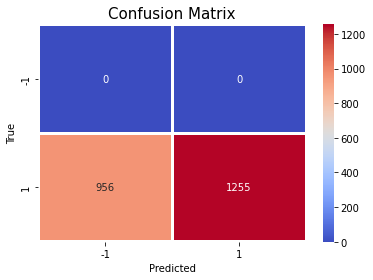

In [ ]:
#Confusion Matrix Table
matrix(Y_test,Y_test_svc)

#Store Result
storeResult(svc, acc_train_svc, acc_test_svc)

**Decision Tree**

In [ ]:
#Create Logistics Regression Object
decision_tree=DecisionTreeClassifier(random_state=42)
 
#Train the model using training data 
decision_tree.fit(X_train,Y_train)

#Test the model using testing data
Y_train_decision_tree=decision_tree.predict(X_train)
Y_test_decision_tree=decision_tree.predict(X_test)

#Decison Tree Accuracy
acc_train_decision_tree=round(((accuracy_score(Y_train, Y_train_decision_tree))*100),3)
acc_test_decision_tree=round(((accuracy_score(Y_test, Y_test_decision_tree))*100),3)

In [ ]:
print("The accuracy of Decision Tree on training data is: ", acc_train_decision_tree,"%")
print("The accuracy of Decision Tree on testing data is: ", acc_test_decision_tree,"%")

The accuracy of Decision Tree on training data is:  98.304 %
The accuracy of Decision Tree on testing data is:  94.527 %


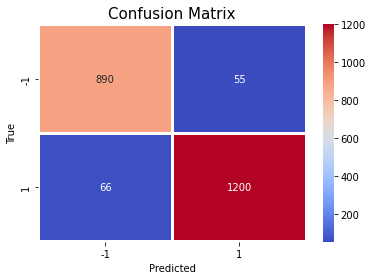

In [ ]:
#Confusion Matrix Table
matrix(Y_test,Y_test_decision_tree)

#Store Result
storeResult(decision_tree, acc_train_decision_tree, acc_test_decision_tree)

**Model Evaluation**

In [ ]:
results = pd.DataFrame({ 'ML Model': ML_Model,    
                         'Train Accuracy': acc_train,
                        'Test Accuracy': acc_test})
results.sort_values(by=['Train Accuracy','Test Accuracy'], ascending=False)

,ML Model,Train Accuracy,Test Accuracy
3,"(DecisionTreeClassifier(max_features='auto', r...",98.304,95.115
4,DecisionTreeClassifier(random_state=42),98.304,94.527
0,LogisticRegression(random_state=42),92.108,91.768
1,KNeighborsClassifier(),77.974,60.335
2,SVC(random_state=42),55.427,56.762


**Comparison of Accuracy Result using URL-based Features, Abnormal Features, HTML and JavaScript-based Features, and Domain-based Features**

In [ ]:
URL=df[["Request_URL","URL_of_Anchor","Links_in_tags","SFH","Submitting_to_email","Abnormal_URL","Redirect","on_mouseover","RightClick","popUpWidnow","Iframe","age_of_domain","DNSRecord","web_traffic","Page_Rank","Google_Index","Links_pointing_to_page","Statistical_report","Result"]]
Abnormal=df[["having_IPhaving_IP_Address","URLURL_Length","Shortining_Service","having_At_Symbol","double_slash_redirecting","Prefix_Suffix","having_Sub_Domain","SSLfinal_State","Domain_registeration_length","Favicon","port","HTTPS_token","Redirect","on_mouseover","RightClick","popUpWidnow","Iframe","age_of_domain","DNSRecord","web_traffic","Page_Rank","Google_Index","Links_pointing_to_page","Statistical_report","Result"]]
HTML=df[["having_IPhaving_IP_Address","URLURL_Length","Shortining_Service","having_At_Symbol","double_slash_redirecting","Prefix_Suffix","having_Sub_Domain","Domain_registeration_length","Favicon","port","HTTPS_token","Request_URL","URL_of_Anchor","Links_in_tags","SFH","Submitting_to_email","Abnormal_URL","age_of_domain","DNSRecord","web_traffic","Page_Rank","Google_Index","Links_pointing_to_page","Statistical_report","Result"]]
Domain=df[["having_IPhaving_IP_Address","URLURL_Length","Shortining_Service","having_At_Symbol","double_slash_redirecting","Prefix_Suffix","having_Sub_Domain","SSLfinal_State","Domain_registeration_length","Favicon","port","HTTPS_token","Request_URL","URL_of_Anchor","Links_in_tags","SFH","Submitting_to_email","Abnormal_URL","Redirect","on_mouseover","RightClick","popUpWidnow","Iframe","Result"]]

**URL-based Features**

In [ ]:
X = URL.drop('Result',axis=1).values 
Y = URL['Result'].values
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
#Create Random Forest Object
Url = "URL-based Features"
random_forest=RandomForestClassifier(random_state=42)
 
#Train the model using training data 
random_forest.fit(X_train,Y_train)

#Test the model using testing data
Y_train_random_forest=random_forest.predict(X_train)
Y_test_random_forest=random_forest.predict(X_test)

#Random Forest Accuracy
acc_train_random_forest_URL=round(((accuracy_score(Y_train, Y_train_random_forest))*100),3)
acc_test_random_forest_URL=round(((accuracy_score(Y_test, Y_test_random_forest))*100),3)
print("The accuracy of Random Forest on training data is: ", acc_train_random_forest_URL,"%")
print("The accuracy of Random Forest on testing data is: ", acc_test_random_forest_URL,"%")

#Store Result
featuresResult(Url,acc_train_random_forest_URL,acc_test_random_forest_URL)

The accuracy of Random Forest on training data is:  95.036 %
The accuracy of Random Forest on testing data is:  93.08 %


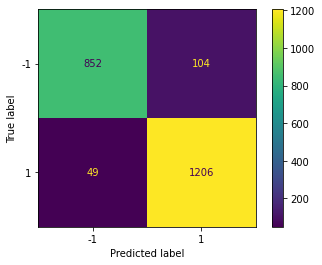

In [ ]:
confusion_matrix=metrics.confusion_matrix(Y_test,Y_test_random_forest)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [-1, 1])

cm_display.plot()
plt.show()

**Abnormal Features**

In [ ]:
X = Abnormal.drop('Result',axis=1).values 
Y = Abnormal['Result'].values
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
#Create Random Forest Object
abnormal = "Abnormal Features"
random_forest=RandomForestClassifier(random_state=42)
 
#Train the model using training data 
random_forest.fit(X_train,Y_train)

#Test the model using testing data
Y_train_random_forest=random_forest.predict(X_train)
Y_test_random_forest=random_forest.predict(X_test)

#Random Forest Accuracy
acc_train_random_forest_Abnormal=round(((accuracy_score(Y_train, Y_train_random_forest))*100),3)
acc_test_random_forest_Abnormal=round(((accuracy_score(Y_test, Y_test_random_forest))*100),3)
print("The accuracy of Random Forest on training data is: ", acc_train_random_forest_Abnormal,"%")
print("The accuracy of Random Forest on testing data is: ", acc_test_random_forest_Abnormal,"%")

#Store Result
featuresResult(abnormal,acc_train_random_forest_Abnormal,acc_test_random_forest_Abnormal)

The accuracy of Random Forest on training data is:  96.936 %
The accuracy of Random Forest on testing data is:  94.392 %


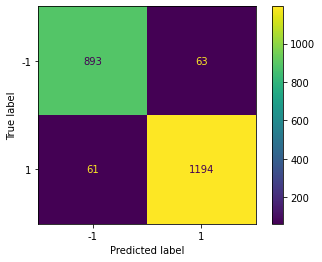

In [ ]:
confusion_matrix=metrics.confusion_matrix(Y_test,Y_test_random_forest)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [-1, 1])

cm_display.plot()
plt.show()

**HTML and JavaScript-based Features**

In [ ]:
X = HTML.drop('Result',axis=1).values 
Y = HTML['Result'].values
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
#Create Random Forest Object
html = "HTML and JavaScript-based Features"
random_forest=RandomForestClassifier(random_state=42)
 
#Train the model using training data 
random_forest.fit(X_train,Y_train)

#Test the model using testing data
Y_train_random_forest=random_forest.predict(X_train)
Y_test_random_forest=random_forest.predict(X_test)

#Random Forest Accuracy
acc_train_random_forest_HTML=round(((accuracy_score(Y_train, Y_train_random_forest))*100),3)
acc_test_random_forest_HTML=round(((accuracy_score(Y_test, Y_test_random_forest))*100),3)
print("The accuracy of Random Forest on training data is: ", acc_train_random_forest_HTML,"%")
print("The accuracy of Random Forest on testing data is: ", acc_test_random_forest_HTML,"%")

#Store Result
featuresResult(html,acc_train_random_forest_HTML,acc_test_random_forest_HTML)

The accuracy of Random Forest on training data is:  98.146 %
The accuracy of Random Forest on testing data is:  94.98 %


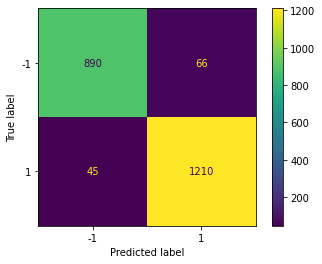

In [ ]:
confusion_matrix=metrics.confusion_matrix(Y_test,Y_test_random_forest)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [-1, 1])

cm_display.plot()
plt.show()

**Domain-based Features**

In [ ]:
X = Domain.drop('Result',axis=1).values 
Y = Domain['Result'].values
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
#Create Random Forest Object
domain = "Domain-based Features"
random_forest=RandomForestClassifier(random_state=42)
 
#Train the model using training data 
random_forest.fit(X_train,Y_train)

#Test the model using testing data
Y_train_random_forest=random_forest.predict(X_train)
Y_test_random_forest=random_forest.predict(X_test)

#Random Forest Accuracy
acc_train_random_forest_Domain=round(((accuracy_score(Y_train, Y_train_random_forest))*100),3)
acc_test_random_forest_Domain=round(((accuracy_score(Y_test, Y_test_random_forest))*100),3)
print("The accuracy of Random Forest on training data is: ", acc_train_random_forest_Domain,"%")
print("The accuracy of Random Forest on testing data is: ", acc_test_random_forest_Domain,"%")

#Store Result
featuresResult(domain,acc_train_random_forest_Domain,acc_test_random_forest_Domain)

The accuracy of Random Forest on training data is:  96.325 %
The accuracy of Random Forest on testing data is:  94.98 %


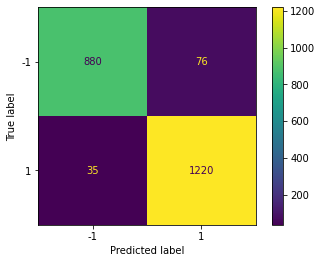

In [ ]:
confusion_matrix=metrics.confusion_matrix(Y_test,Y_test_random_forest)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [-1, 1])

cm_display.plot()
plt.show()

In [ ]:
results = pd.DataFrame({ 'Features': Features,    
                         'Train Accuracy': acc_Ftrain,
                        'Test Accuracy': acc_Ftest})
results.sort_values(by=['Train Accuracy','Test Accuracy'], ascending=False)

,Features,Train Accuracy,Test Accuracy
2,HTML and JavaScript-based Features,98.146,94.980
1,Abnormal Features,96.936,94.392
3,Domain-based Features,96.325,94.980
0,URL-based Features,95.036,93.080


**Features Correlating With Result**

In [ ]:
corr_result=df[["SSLfinal_State","URL_of_Anchor","Prefix_Suffix","web_traffic","having_Sub_Domain","Request_URL","Links_in_tags","SFH","Google_Index","age_of_domain","Page_Rank","having_IPhaving_IP_Address","Statistical_report","DNSRecord","URLURL_Length","having_At_Symbol","on_mouseover","port","Links_pointing_to_page","Submitting_to_email","RightClick","popUpWidnow","Result"]]
corr_result1=df[["SSLfinal_State","URL_of_Anchor","Prefix_Suffix","web_traffic","having_Sub_Domain","Request_URL","Links_in_tags","SFH","Result"]]
corr_testing=df[["SSLfinal_State","URL_of_Anchor","Prefix_Suffix","web_traffic","having_Sub_Domain","Request_URL","Links_in_tags","SFH","Google_Index","age_of_domain","Page_Rank","having_IPhaving_IP_Address","having_At_Symbol","Result"]]
corr_testing1=df[["SSLfinal_State","URL_of_Anchor","Prefix_Suffix","web_traffic","having_Sub_Domain","Request_URL","Links_in_tags","SFH","Google_Index","age_of_domain","Page_Rank","having_IPhaving_IP_Address","Statistical_report","DNSRecord","URLURL_Length","having_At_Symbol","on_mouseover","port","Links_pointing_to_page","Result"]]

In [ ]:
X = corr_testing1.drop('Result',axis=1).values 
Y = corr_testing1['Result'].values
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
#Create Random Forest Object
random_forest=RandomForestClassifier(random_state=42)
 
#Train the model using training data 
random_forest.fit(X_train,Y_train)

#Test the model using testing data
Y_train_random_forest=random_forest.predict(X_train)
Y_test_random_forest=random_forest.predict(X_test)

#Random Forest Accuracy
acc_train_random_forest=round(((accuracy_score(Y_train, Y_train_random_forest))*100),3)
acc_test_random_forest=round(((accuracy_score(Y_test, Y_test_random_forest))*100),3)

#Random Forest Accuracy
acc_train_random_forest=round(((accuracy_score(Y_train, Y_train_random_forest))*100),3)
acc_test_random_forest=round(((accuracy_score(Y_test, Y_test_random_forest))*100),3)
print("The accuracy of Random Forest on training data is: ", acc_train_random_forest,"%")
print("The accuracy of Random Forest on testing data is: ", acc_test_random_forest,"%")

The accuracy of Random Forest on training data is:  98.756 %
The accuracy of Random Forest on testing data is:  96.201 %


In [ ]:
X = corr_testing.drop('Result',axis=1).values 
Y = corr_testing['Result'].values
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
#Create Logistics Regression Object
decision_tree=DecisionTreeClassifier(random_state=42)
 
#Train the model using training data 
decision_tree.fit(X_train,Y_train)

#Test the model using testing data
Y_train_decision_tree=decision_tree.predict(X_train)
Y_test_decision_tree=decision_tree.predict(X_test)

#Decison Tree Accuracy
acc_train_decision_tree=round(((accuracy_score(Y_train, Y_train_decision_tree))*100),3)
acc_test_decision_tree=round(((accuracy_score(Y_test, Y_test_decision_tree))*100),3)
print("The accuracy of Random Forest on training data is: ", acc_train_decision_tree,"%")
print("The accuracy of Random Forest on testing data is: ", acc_test_decision_tree,"%")

The accuracy of Random Forest on training data is:  91.644 %
The accuracy of Random Forest on testing data is:  92.447 %


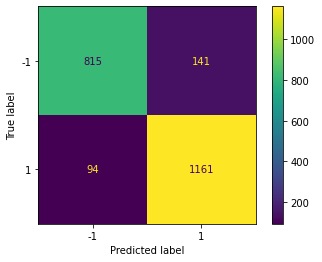

In [ ]:
confusion_matrix=metrics.confusion_matrix(Y_test,Y_test_random_forest)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [-1, 1])

cm_display.plot()
plt.show()

In [ ]:
# Make pickle file of Random Forest model
pickle.dump(random_forest, open("model.pkl", "wb"))

In [ ]:
loaded_model=pickle.load(open("model.pkl", "rb"))
print(loaded_model.predict([[1,-1,-1]]))

[-1]


In [ ]:
from urllib.parse import urlparse
import ipaddress
url = input("Enter url link: ")

def havingIP(url):
    try:
        ipaddress.ip_address(url)
        return 1
    except:
        return -1

def havingAtSymbol(url):
    if "@" in url:
        return 1
    else:
        return -1

def prefixSuffix(url):
    if '-' in url:
        return 1
    else:
        return -1

def finalFeatures(url):
    features=[havingIP(url),havingAtSymbol(url), prefixSuffix(url)]
    return features

print(finalFeatures(url))

Enter url link: 8.8.8.8
[1, -1, -1]
